### it is used for both classification and regression
### It finds the otimal hyperplane in an Nn dimensional space that can be separate the data in different classes in feature space 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# load the data
d_set=pd.read_csv("placement.csv")
d_set.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
d_set

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


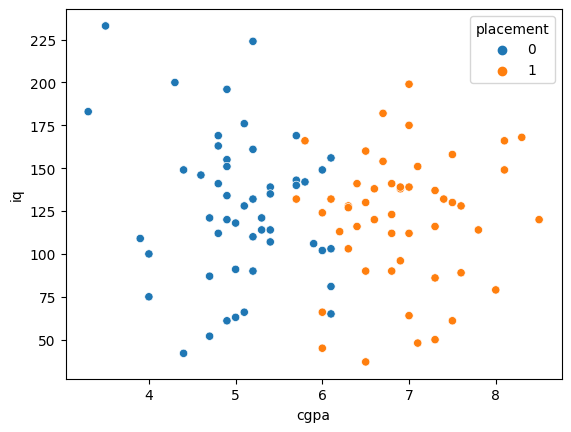

In [5]:
# grfaph
sns.scatterplot(x=d_set['cgpa'], y=d_set['iq'], data=d_set, hue=d_set['placement'])
plt.show()

### result: the points are almost linearly separable

In [6]:
# separating
x=d_set.iloc[:,:-1]
y=d_set['placement']

# since the values of cgpa are far less than those of iq 
# therefore we need to scall down the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x)

# now dataframe
x=pd.DataFrame(sc.transform(x), columns=x.columns)

In [7]:
# split the data
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2)

# model
from sklearn.svm import SVC # C=classifier

svm=SVC(kernel='linear') # kernel can be poly, rbf, sigmoid etc 
# but accordnig to the data and above graph the points are linearly separabel and hence we can make use of linear kernel
# fit the data
svm.fit(xtrain, ytrain)

SVC(kernel='linear')

In [8]:
# score
svm.score(xtest, ytest)*100

95.0

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


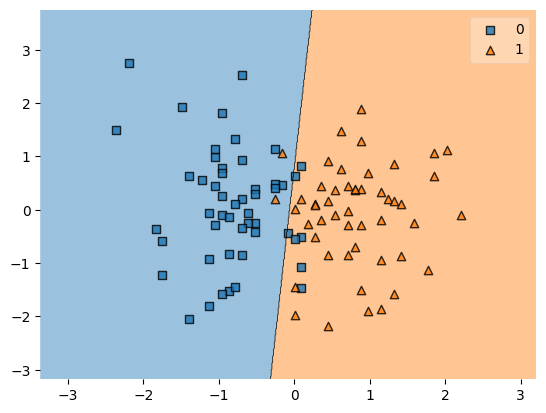

In [9]:
# plot the boundries
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=svm)
plt.show()